
The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit

First read of the datasets' columns we can conclude some few basic facts and assumptions:

1.Serial No. is just for providing a unique index and is thus ignored in any analysis, as it's improbable that it indicates an order of admission in terms of time or priority.

2.Almost all data are assumed to be collerated to the chance of admission.


Importing Modules and Reading the .csv File

In [1]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")   # ignore if any warnings are there

In [2]:
#Importing the dataset
df=pd.read_csv(r"C:\Jupyter\DSML\DSML\Linear Regression\Admission_Predict_Ver1.1.csv")
df=pd.DataFrame(df)
df.shape

(500, 9)

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
#Check for missing values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Chance of Admit      0.0
Research             0.0
CGPA                 0.0
LOR                  0.0
SOP                  0.0
University Rating    0.0
TOEFL Score          0.0
GRE Score            0.0
Serial No.           0.0
dtype: float64

Since there are no missing values we will begin with EDA

In [7]:
df.drop('Serial No.', inplace=True, axis=1)
df.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [8]:
## Correlation coeffecients 
df.corr().abs().style.background_gradient(cmap='coolwarm')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1,0.8272,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.8272,1,0.649799,0.64441,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.64441,0.728024,1,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1


In [9]:
df.corrwith(df['Chance of Admit'])

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
dtype: float64

Exploring GRE Scores

In [10]:
# Isolating GRE Score data
GRE = df['GRE Score']
GRE.describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

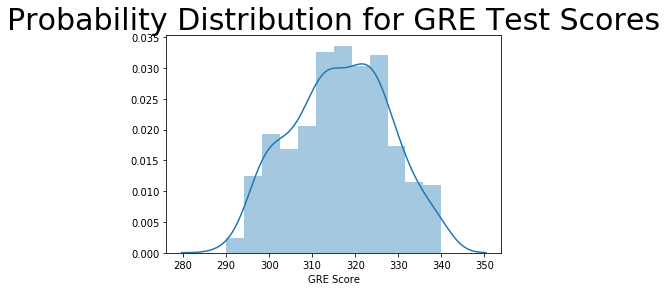

In [11]:
# # Probability Distribution
sbn.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='30')
plt.show()

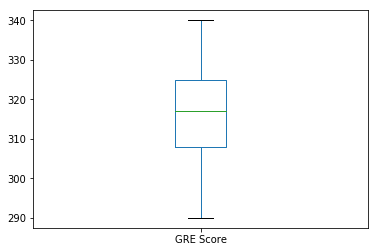

In [12]:
GRE.plot(kind='box')

Exploring TOEFL Scores

In [13]:
# Isolating TOEFL Score data
TOEFL = df['TOEFL Score']
TOEFL.describe()

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

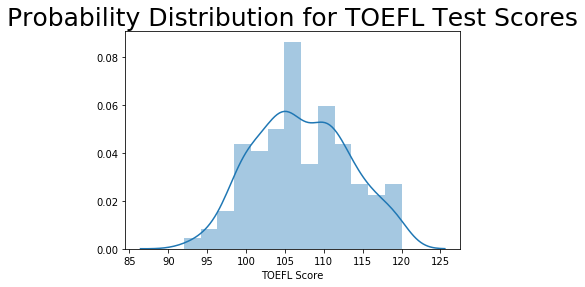

In [14]:
# # Probability Distribution
sbn.distplot(TOEFL).set_title('Probability Distribution for TOEFL Test Scores', size='25')
plt.show()

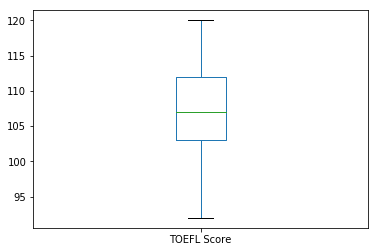

In [15]:
TOEFL.plot(kind='box')

Applying Linear Regression

In [16]:
x=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression(normalize=True, fit_intercept=True)
trainX,testX, trainY,testY = train_test_split(x,y,test_size=0.33, random_state=1)

In [18]:
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [19]:
pred = lr.predict(testX)

In [20]:
print('Mean Absolute Error is ',mean_absolute_error(y_pred=pred,y_true=testY))
print('R2 Score is ',r2_score(y_pred=pred,y_true=testY))

Mean Absolute Error is  0.045051938982238596
R2 Score is  0.8090028838425638
